In [8]:
%matplotlib inline

In [9]:
# dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
# Reference file path
csv_path = "Output/clean_data.csv"

# Read the CSV into a Pandas DataFrame
homicides_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
homicides_df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,402433,Anchorage,Alaska,2000,January,1,Murder or Manslaughter,Yes,Female,25,Black,Male,28,Black,Romantic,Firearm
1,402434,Anchorage,Alaska,2000,January,2,Murder or Manslaughter,Yes,Female,31,White,Male,18,Native American/Alaska Native,Unknown,Firearm
2,402435,Anchorage,Alaska,2000,January,3,Manslaughter by Negligence,Yes,Male,1,Asian/Pacific Islander,Male,12,Asian/Pacific Islander,Family,Blunt Object
3,402436,Anchorage,Alaska,2000,February,1,Manslaughter by Negligence,Yes,Male,0,Asian/Pacific Islander,Female,39,Asian/Pacific Islander,Friend,Blunt Object
4,402437,Anchorage,Alaska,2000,March,1,Murder or Manslaughter,No,Female,29,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Knife


# Homicides Per Year

- Review of homicides per year using a line chart to show the change from year to year.

In [11]:
# group by year
homicides_yr = homicides_df.groupby(["Year"])

# total number of incidents per year
total_homicides = homicides_yr["Incident"].count()
# total_homicides


homicides_per_yr_df = pd.DataFrame(total_homicides)
homicides_per_yr_df

,Incident
Year,
2000,14671
2001,15803
2002,16268
2003,16512
2004,16233
2005,16836
2006,17275
2007,17303
2008,15595


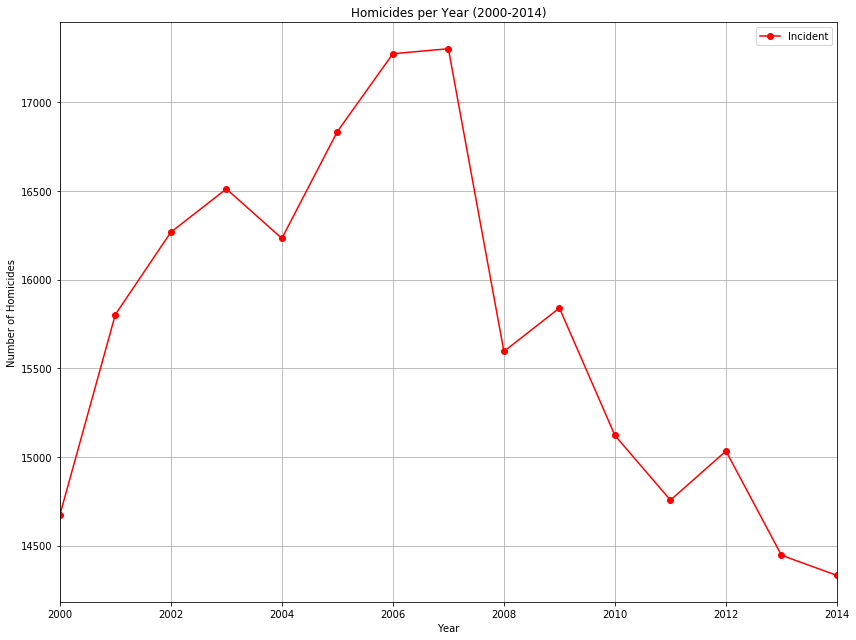

In [12]:
# line graph to show total number of homicides per year
homicides_per_yr_df.plot(kind="line", marker='o', color='red', figsize=(12, 9))
plt.grid(True)
plt.title("Homicides per Year (2000-2014)")
plt.xlabel("Year")
plt.ylabel("Number of Homicides")
plt.tight_layout()
plt.savefig("Output/homicides_per_year.png")
plt.show()

# Homicides by Age

- Bar chart to show homicides by age w/ victim sex as legend

In [14]:
#create bins based on age
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 1000]

#create labels for each bin
group_labels = ["<10","10-19","20-29","30-39","40-49", "50-59", "60-69", "70-79", "80+"]

#store original data frame into a new variable related to age
victims_age_df = homicides_df[homicides_df["Victim Age"] != 0]

#using pd.cut, categorize players into bins, creating new column
victims_age_df["Age Demographics"] = pd.cut(victims_age_df["Victim Age"], bins, labels=group_labels)

# groupby Age Demographics and separate out by gender
female_victims = victims_age_df[victims_age_df["Victim Sex"] == "Female"].groupby(["Age Demographics"])
male_victims = victims_age_df[victims_age_df["Victim Sex"] == "Male"].groupby(["Age Demographics"])

# number of incidents by Age Demographic
homicides_by_age_female = female_victims["Incident"].count()
homicides_by_age_male = male_victims["Incident"].count()
print(homicides_by_age_female)
print("------------------------")
print(homicides_by_age_male)

Age Demographics
<10       3314
10-19     4535
20-29    11300
30-39     9936
40-49     8972
50-59     5029
60-69     2577
70-79     1870
80+       2388
Name: Incident, dtype: int64
------------------------
Age Demographics
<10       4062
10-19    23725
20-29    67023
30-39    37589
40-49    24202
50-59    14018
60-69     5617
70-79     2589
80+       3489
Name: Incident, dtype: int64


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
# creating dataframe to make barchart
homicides_by_age = ({"Male":homicides_by_age_male,
                    "Female":homicides_by_age_female})
homicides_by_age_df = pd.DataFrame(homicides_by_age)
homicides_by_age_df

,Male,Female
Age Demographics,,
<10,4062,3314
10-19,23725,4535
20-29,67023,11300
30-39,37589,9936
40-49,24202,8972
50-59,14018,5029
60-69,5617,2577
70-79,2589,1870
80+,3489,2388


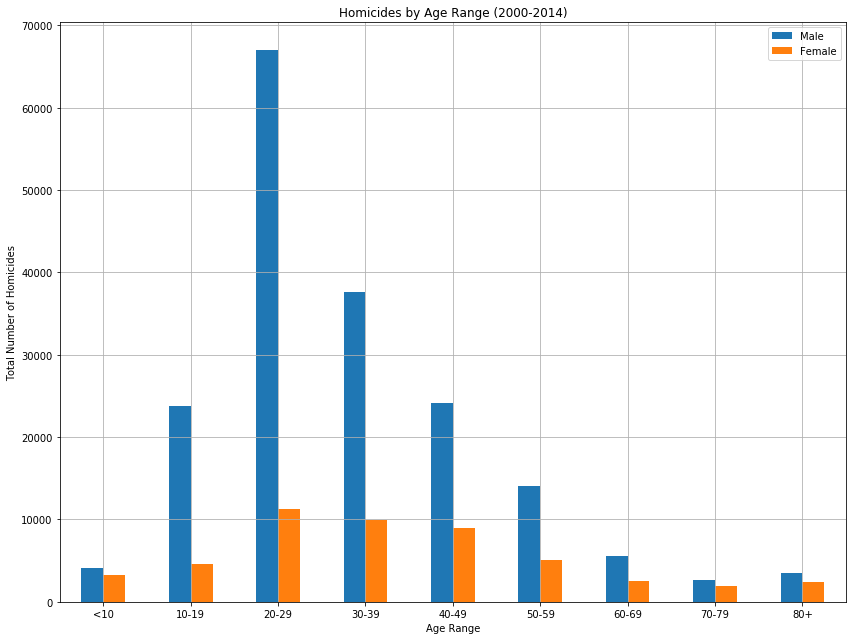

In [17]:
# Configure plot
homicides_by_age_df.plot.bar(rot=0, figsize=(12, 9))
plt.grid(True)
plt.title("Homicides by Age Range (2000-2014)")
plt.ylabel("Total Number of Homicides")
plt.xlabel("Age Range")
plt.tight_layout()
plt.savefig("Output/homicides_by_age.png")
plt.show()